# Section 1

# Part I - Histograms of Word Frequencies

In [1]:
%%capture
!pip install nltk

In [2]:
import nltk
import os

In [3]:
%%capture
!pip install spacy==3.8.0

!spacy download en_core_web_sm
!spacy download de_core_news_sm
!spacy download nl_core_news_sm

In [4]:
%%capture
!pip install matplotlib
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

In [9]:
os.getcwd()

'C:\\Users\\praga\\Desktop\\Analysing Data\\Assignment1'

In [10]:
directory = "Part_I_1-2"

In [11]:
# Check if the folder exists
if os.path.exists(directory):
    print(f"The folder exists: {directory}")
else:
    print(f"The folder does not exist: {directory}")

The folder exists: Part_I_1-2


In [52]:
#Function to remove punctuation from text to make frequency clearer
def remove_punc(text):
    punctuation = '!@#$%^&*()_-+={}[]:;"\'|<>,.?/~`'
    return ''.join(character for character in text
                   if character not in punctuation)

In [53]:
#Open files, read them, and calculate word frequency of individual texts and the corpus as a whole
word_freq = {} 
total_word_freq = {}

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
       file_path = os.path.join(directory, filename)

       with open(file_path, 'r', encoding = 'utf-8') as file: 
           fulltext = file.read()
           #remove punctuation
           text = remove_punc(fulltext)
            
       #split texts into sentences and words 
       sentences = sent_tokenize(text)
       words = word_tokenize(text) 
        #use Counter function 
       word_count = Counter(words)
        #create dictionary where each filename is key and its frequency counter is the value
       word_freq[filename] = word_count
        #use .update to get frequency counter for entire corpus
       total_word_freq.update(word_count)  

In [58]:
word_freq

{'01.txt': Counter({'the': 14,
          'her': 12,
          'River': 11,
          'Missy': 10,
          'a': 10,
          'and': 9,
          'to': 8,
          'was': 7,
          'on': 7,
          '“': 6,
          '”': 6,
          'maps': 5,
          'at': 5,
          '’': 5,
          'it': 4,
          'over': 4,
          's': 4,
          'sitting': 3,
          'chair': 3,
          'had': 3,
          'The': 3,
          'that': 3,
          'placing': 3,
          'she': 3,
          'in': 2,
          'house': 2,
          'map': 2,
          'out': 2,
          'of': 2,
          'people': 2,
          'own': 2,
          'this': 2,
          'She': 2,
          'looked': 2,
          'smiled': 2,
          'still': 2,
          'place': 2,
          'It': 2,
          'smiles': 2,
          'leans': 2,
          'kiss': 2,
          'smile': 2,
          'table': 2,
          'cup': 2,
          'coffee': 2,
          'or': 2,
          'little': 2,
          'tur

In [59]:
total_word_freq

{'Another': 1,
 'plot': 1,
 'BonesBard': 1,
 'Missy': 10,
 'was': 37,
 'sitting': 1,
 'on': 22,
 'a': 71,
 'chair': 3,
 'in': 42,
 'house': 1,
 'maps': 5,
 'and': 78,
 'papers': 1,
 'spread': 1,
 'around': 8,
 'normally': 1,
 'her': 76,
 'planning': 1,
 'mental': 1,
 'but': 18,
 'River': 3,
 'had': 9,
 'suggested': 1,
 'physical': 1,
 'map': 2,
 'to': 110,
 'refer': 1,
 'it': 38,
 'helpful': 1,
 'walked': 1,
 'out': 26,
 'of': 52,
 'the': 114,
 'bedroom': 1,
 '“': 89,
 'The': 19,
 'people': 1,
 'who': 3,
 'own': 2,
 'this': 8,
 'really': 8,
 'have': 15,
 'no': 5,
 'good': 7,
 'clothes': 1,
 '”': 89,
 'She': 28,
 'wearing': 1,
 'tshirt': 1,
 'that': 38,
 'drenched': 1,
 'form': 1,
 'some': 4,
 'trousers': 1,
 'looked': 5,
 'about': 11,
 'right': 9,
 'size': 1,
 'smiled': 1,
 'still': 3,
 'Mary': 1,
 'Poppins': 1,
 'looking': 1,
 'outfit': 1,
 'over': 5,
 'at': 29,
 'Darling': 1,
 'wouldn': 1,
 '’': 109,
 't': 52,
 'be': 16,
 'better': 4,
 'start': 1,
 'there': 10,
 'pointed': 2,
 'place

## Plotting 25 Most Frequent Words Per Story

Histogram for 01.txt saved as ../Assignment1\01.txt_histogram.png
Histogram for 02.txt saved as ../Assignment1\02.txt_histogram.png
Histogram for 03.txt saved as ../Assignment1\03.txt_histogram.png
Histogram for 04.txt saved as ../Assignment1\04.txt_histogram.png
Histogram for 05.txt saved as ../Assignment1\05.txt_histogram.png


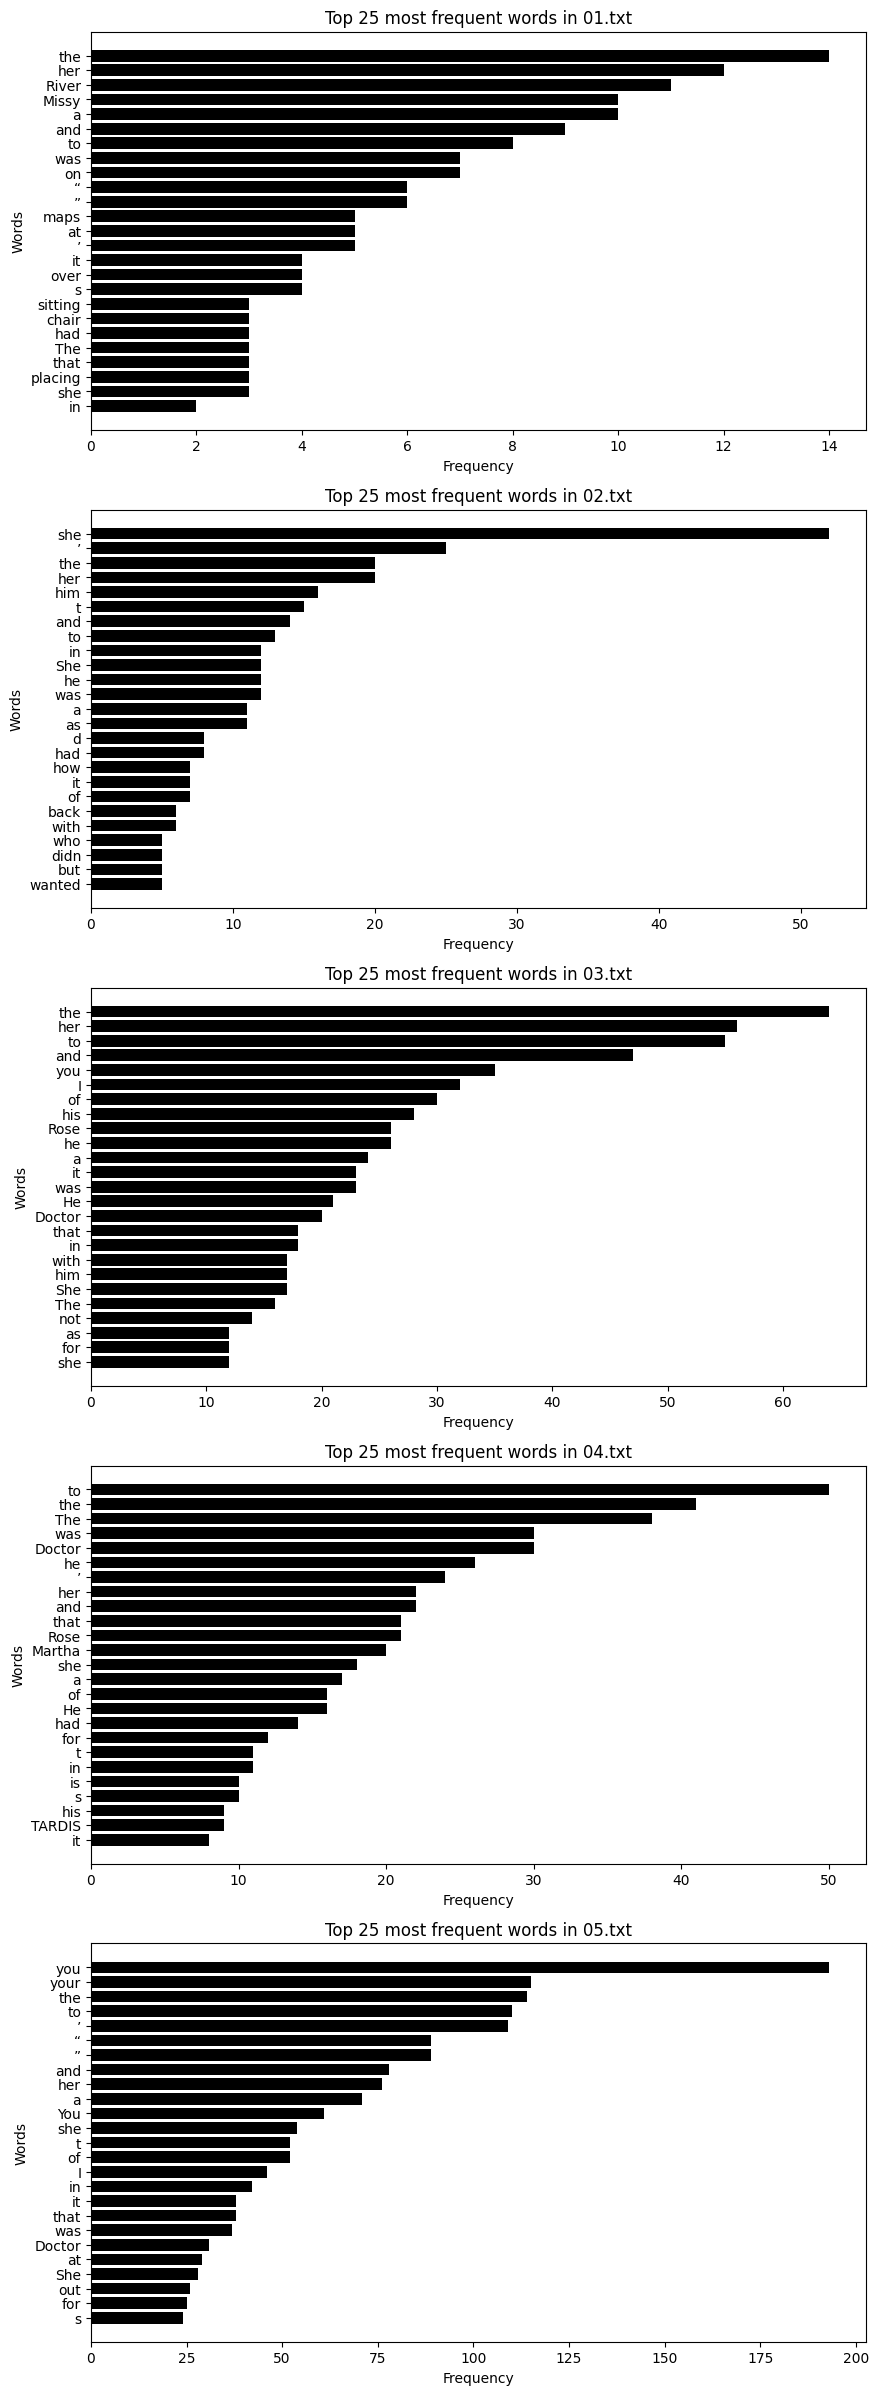

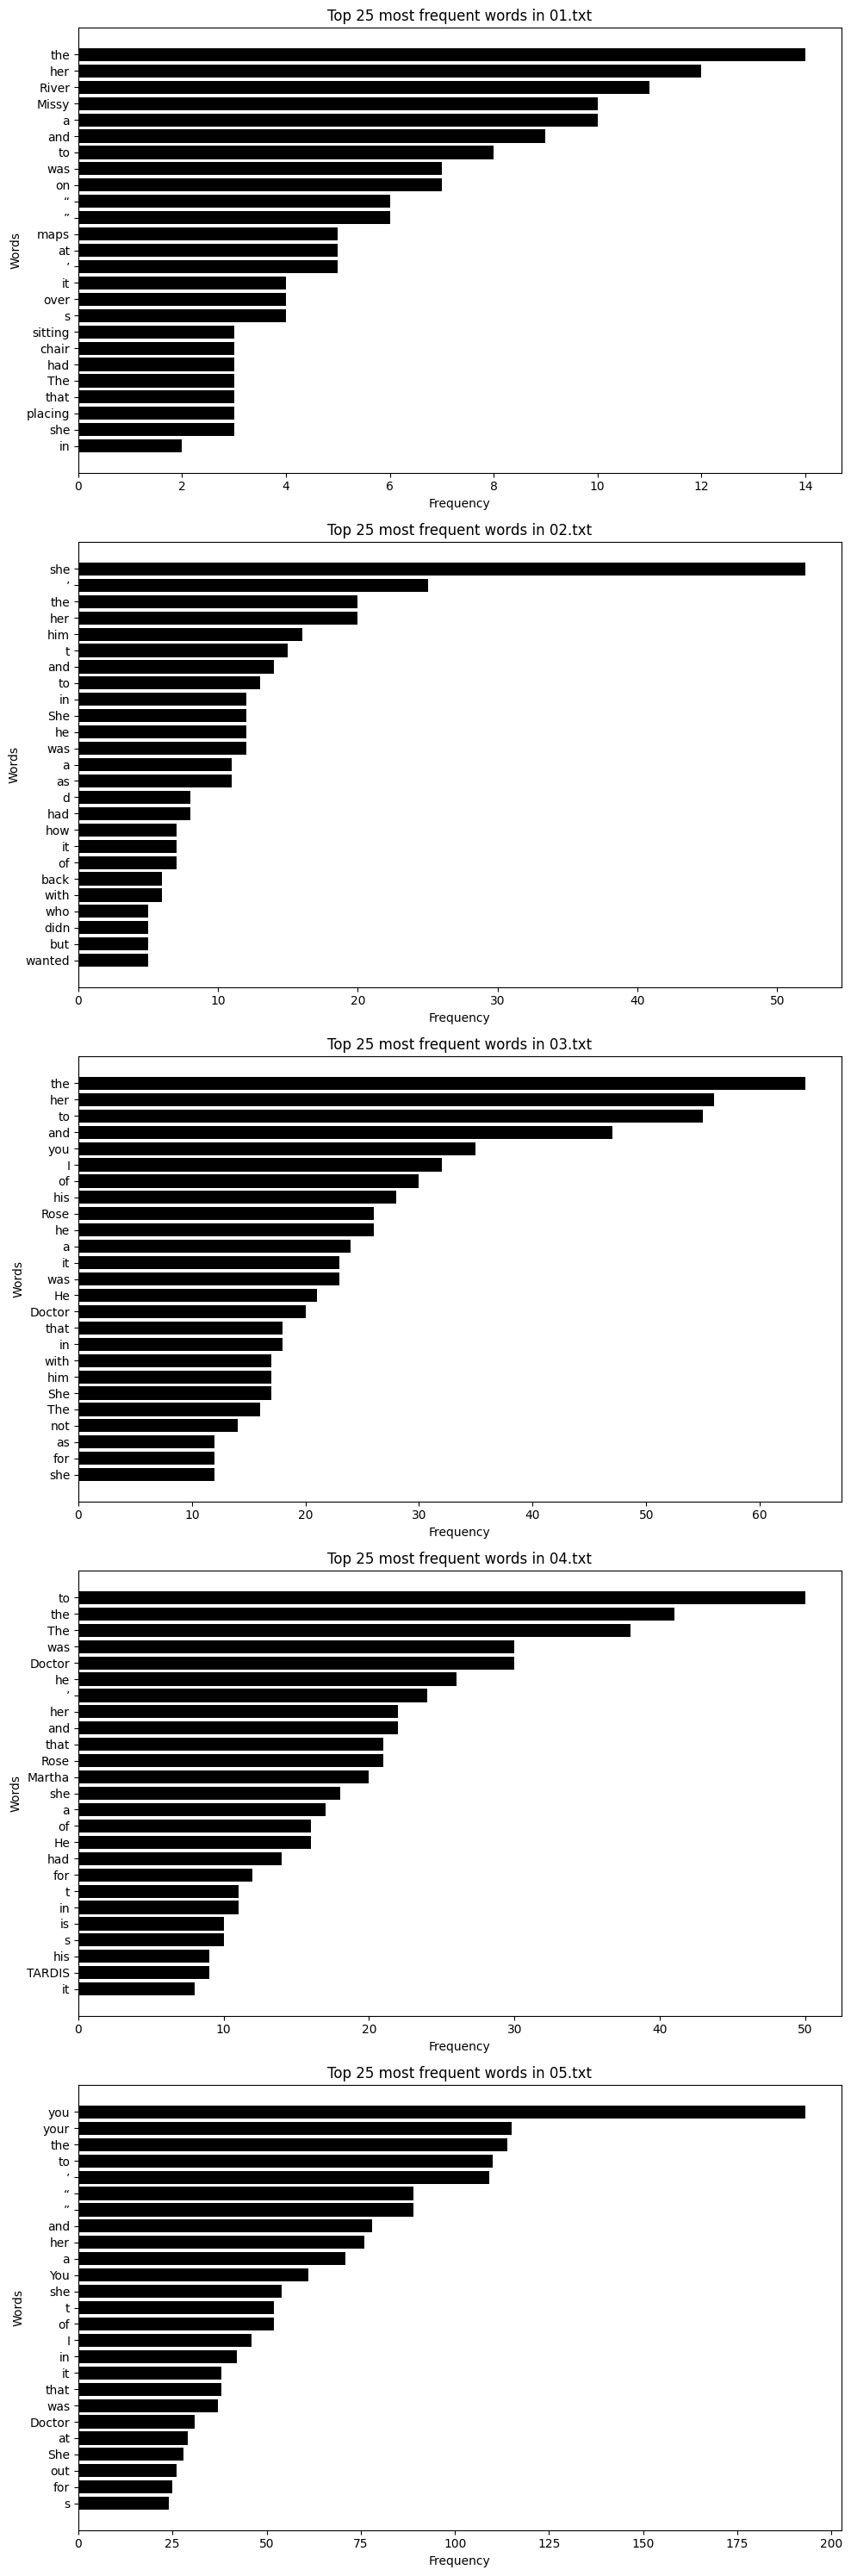

In [68]:
#plot 25 most common words per story as histograms
index = 0
fig, axes = plt.subplots(len(word_freq), 1, figsize = (10, 6 * len(word_freq)))

#Location to export images/output
output_directory = "../Assignment1"
os.makedirs(output_directory, exist_ok=True)

#loop through the dictionary
for filename, word_count in word_freq.items():
    top_25 = word_count.most_common(25)

    #separate each file for plotting
    words, freqs = zip(*top_25)

    #plot most freq 25 for file 01
    axes[index].barh(words, freqs, color = 'black')
    axes[index].set_title(f"Top 25 most frequent words in {filename}")
    axes[index].set_xlabel('Frequency')
    axes[index].set_ylabel('Words')

    #invert y axis to have most freq word on top
    axes[index].invert_yaxis()

  # Save the plot for each file (as a PNG file)
    output_file_path = os.path.join(output_directory, f"{filename}_histogram.png")
    plt.savefig(output_file_path)
    print(f"Histogram for {filename} saved as {output_file_path}")

    # Increment the index for the next plot
    index += 1

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots after saving (optional if you also want to view them)
plt.show()


## Plotting 25 Most Frequent Words in the Corpus

<Figure size 640x480 with 0 Axes>

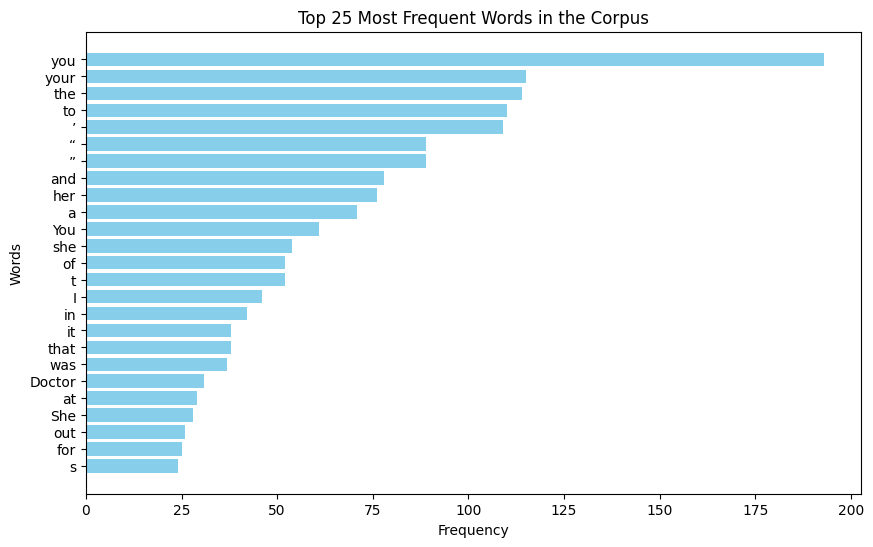

In [160]:
# Get the top 25 most common words from the total word frequency

# Convert total_word_freq (a dictionary) to a Counter
total_word_freq_counter = Counter(total_word_freq)

top_25_total = total_word_freq_counter.most_common(25)

# Separate the words and frequencies for plotting
words, freqs = zip(*top_25_total)

plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.barh(words, freqs, color='skyblue')  # Horizontal bar chart

# Add titles and labels
plt.title('Top 25 Most Frequent Words in the Corpus')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Invert the y-axis to display the most frequent word at the top
plt.gca().invert_yaxis()

# Display the plot

plt.savefig('total_word_frequencies_histogram.png')  # Save to a file

plt.show()


# Part II - Using Stemmers

## Using Porter Stemmer

In [72]:
#Applying stemmer
porter = PorterStemmer()

#Open files, read them, and calculate word frequency of individual texts and the corpus as a whole
p_word_freq = {} 
p_total_word_freq = {}

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
       file_path = os.path.join(directory, filename)

       with open(file_path, 'r', encoding = 'utf-8') as file: 
           fulltext = file.read()
           #remove punctuation
           text = remove_punc(fulltext)
            
       #split texts into sentences and words 
       sentences = sent_tokenize(text)
       words = word_tokenize(text) 
       p_stems = [porter.stem(word) for word in words] 
        #use Counter function 
       word_count = Counter(p_stems)
        #create dictionary where each filename is key and its frequency counter is the value
       p_word_freq[filename] = word_count
        #use .update to get frequency counter for entire corpus
       p_total_word_freq.update(word_count)  

### Histogram for 25 Most Frequent (Porter) Stemmed Words/Story

p_Histogram for 01.txt saved as ../Assignment1\01.txt_p_histogram.png
p_Histogram for 02.txt saved as ../Assignment1\02.txt_p_histogram.png
p_Histogram for 03.txt saved as ../Assignment1\03.txt_p_histogram.png
p_Histogram for 04.txt saved as ../Assignment1\04.txt_p_histogram.png
p_Histogram for 05.txt saved as ../Assignment1\05.txt_p_histogram.png


<Figure size 640x480 with 0 Axes>

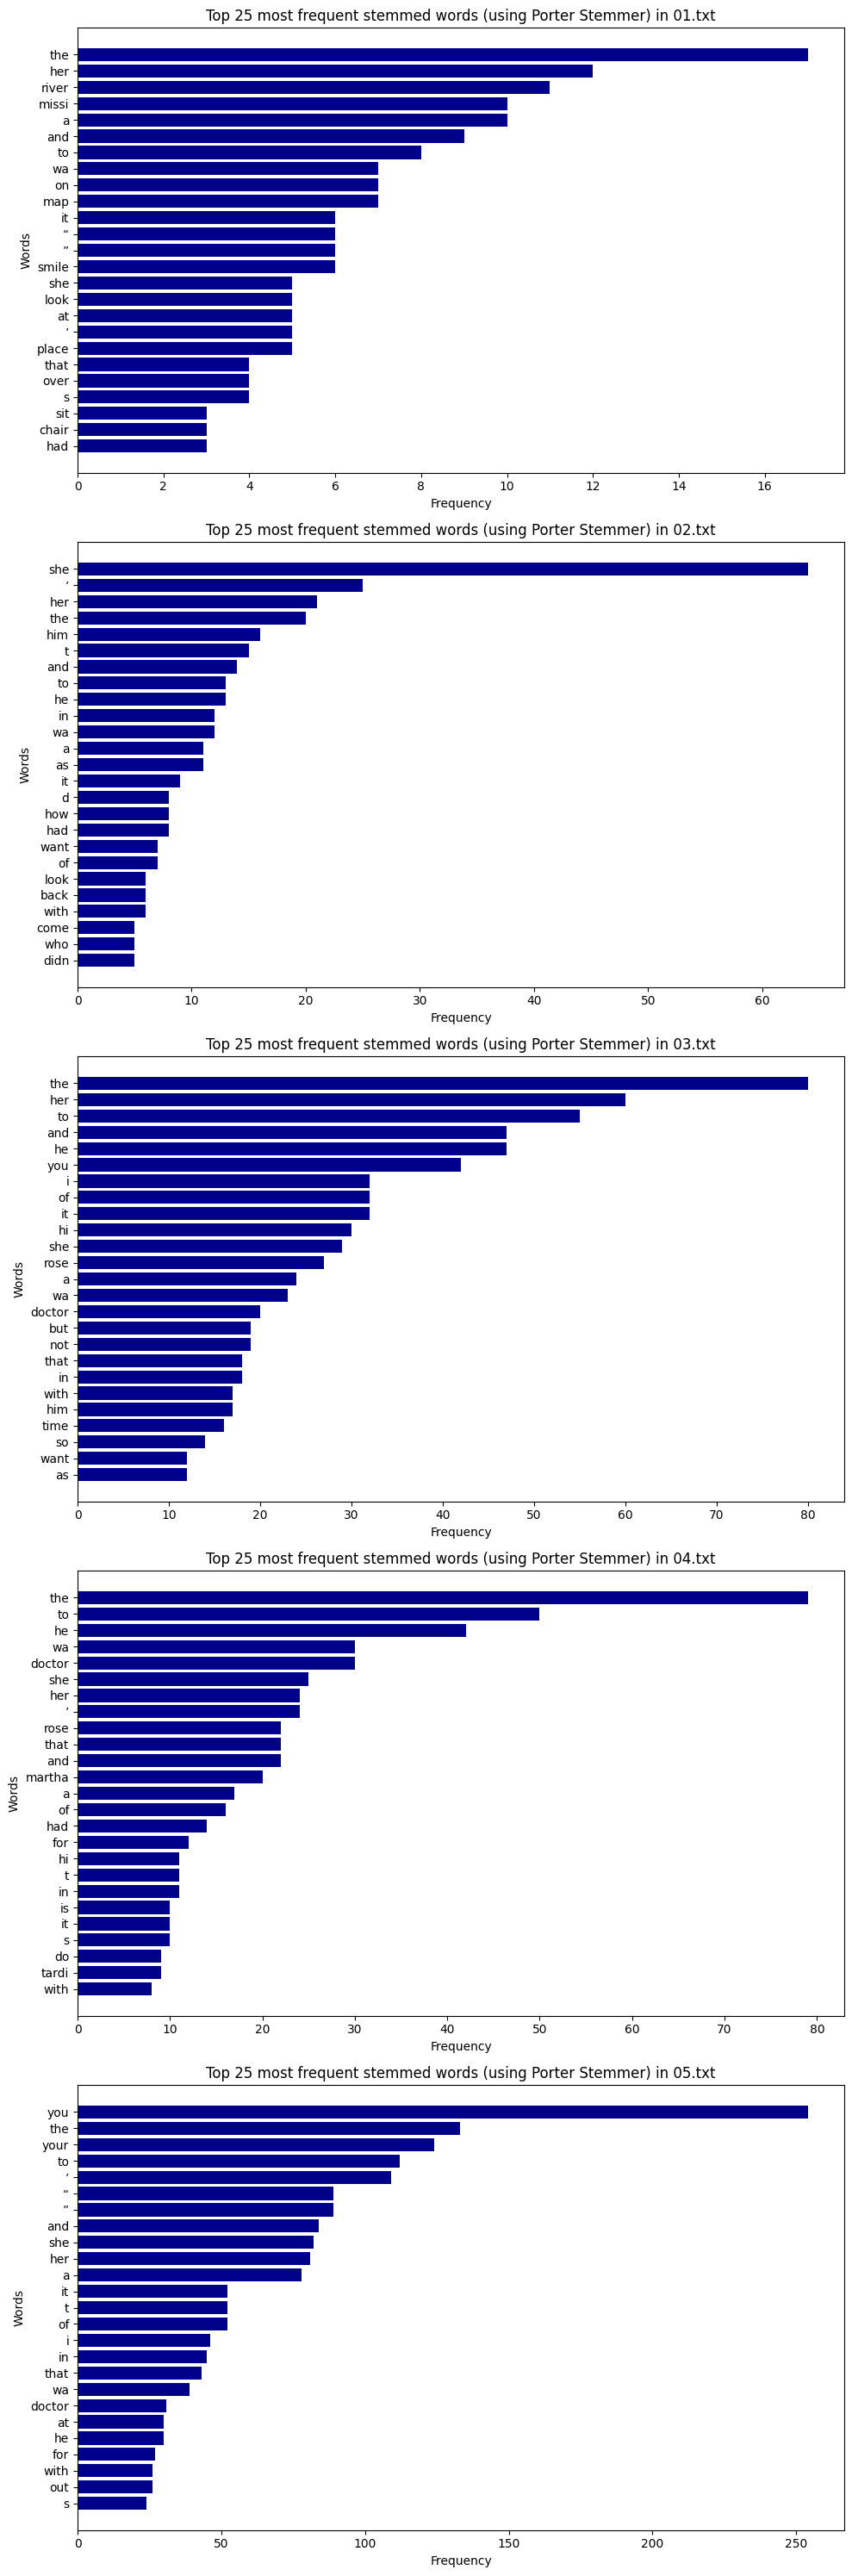

In [73]:
#plot 25 most common words per story as histograms
index = 0
fig, axes = plt.subplots(len(word_freq), 1, figsize = (10, 6 * len(word_freq)))

#Location to export images/output
output_directory = "../Assignment1"
os.makedirs(output_directory, exist_ok=True)

#loop through the dictionary
for filename, word_count in p_word_freq.items():
    top_25 = word_count.most_common(25)

    #separate each file for plotting
    words, freqs = zip(*top_25)

    #plot most freq 25 for file 01
    axes[index].barh(words, freqs, color = 'darkblue')
    axes[index].set_title(f"Top 25 most frequent stemmed words (using Porter Stemmer) in {filename}")
    axes[index].set_xlabel('Frequency')
    axes[index].set_ylabel('Words')

    #invert y axis to have most freq word on top
    axes[index].invert_yaxis()

  # Save the plot for each file (as a PNG file)
    output_file_path = os.path.join(output_directory, f"{filename}_p_histogram.png")
    plt.savefig(output_file_path)
    print(f"p_Histogram for {filename} saved as {output_file_path}")

    # Increment the index for the next plot
    index += 1

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots after saving (optional if you also want to view them)
plt.show()


### Histogram for 25 Most Frequent (Porter) Stemmed Words in the Corpus

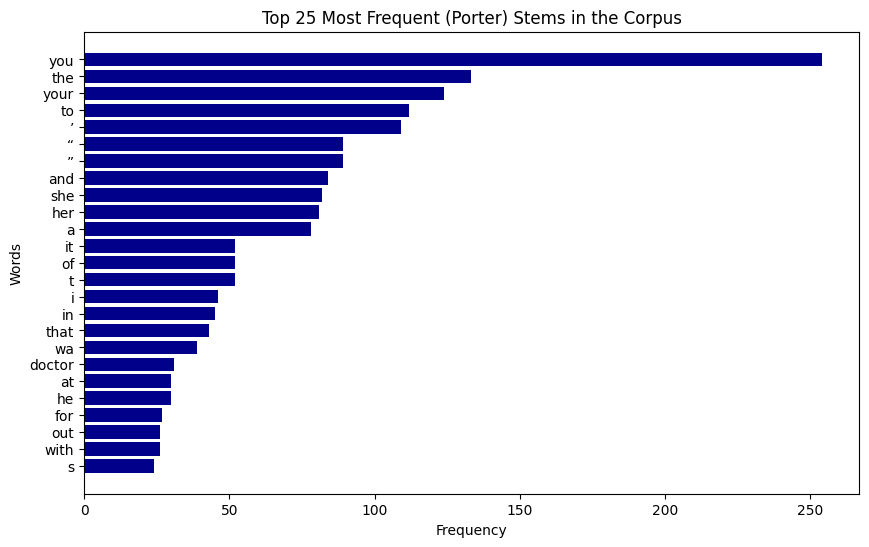

In [161]:
# Get the top 25 most common porter stemmed words from the total word frequency

# Convert total_word_freq (a dictionary) to a Counter
p_total_word_freq_counter = Counter(p_total_word_freq)

top_25_total = p_total_word_freq_counter.most_common(25)

# Separate the words and frequencies for plotting
words, freqs = zip(*top_25_total)

plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.barh(words, freqs, color='darkblue')  # Horizontal bar chart

# Add titles and labels
plt.title('Top 25 Most Frequent (Porter) Stems in the Corpus')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Invert the y-axis to display the most frequent word at the top
plt.gca().invert_yaxis()

plt.savefig('porterstemmed_total_word_frequencies_histogram.png')  # Save to a file

plt.show()


## Using Lancaster Stemmer

In [79]:
#Applying stemmer
lancaster = LancasterStemmer()

#Open files, read them, and calculate word frequency of individual texts and the corpus as a whole
l_word_freq = {} 
l_total_word_freq = {}

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
       file_path = os.path.join(directory, filename)

       with open(file_path, 'r', encoding = 'utf-8') as file: 
           fulltext = file.read()
           #remove punctuation
           text = remove_punc(fulltext)
            
       #split texts into sentences and words 
       sentences = sent_tokenize(text)
       words = word_tokenize(text) 
       l_stems = [lancaster.stem(word) for word in words] 
        #use Counter function 
       word_count = Counter(l_stems)
        #create dictionary where each filename is key and its frequency counter is the value
       l_word_freq[filename] = word_count
        #use .update to get frequency counter for entire corpus
       l_total_word_freq.update(word_count)  

### Plotting 25 Most Frequent (Lancaster) Stems per Story 

l_Histogram for 01.txt saved as ../Assignment1\01.txt_l_histogram.png
l_Histogram for 02.txt saved as ../Assignment1\02.txt_l_histogram.png
l_Histogram for 03.txt saved as ../Assignment1\03.txt_l_histogram.png
l_Histogram for 04.txt saved as ../Assignment1\04.txt_l_histogram.png
l_Histogram for 05.txt saved as ../Assignment1\05.txt_l_histogram.png


<Figure size 640x480 with 0 Axes>

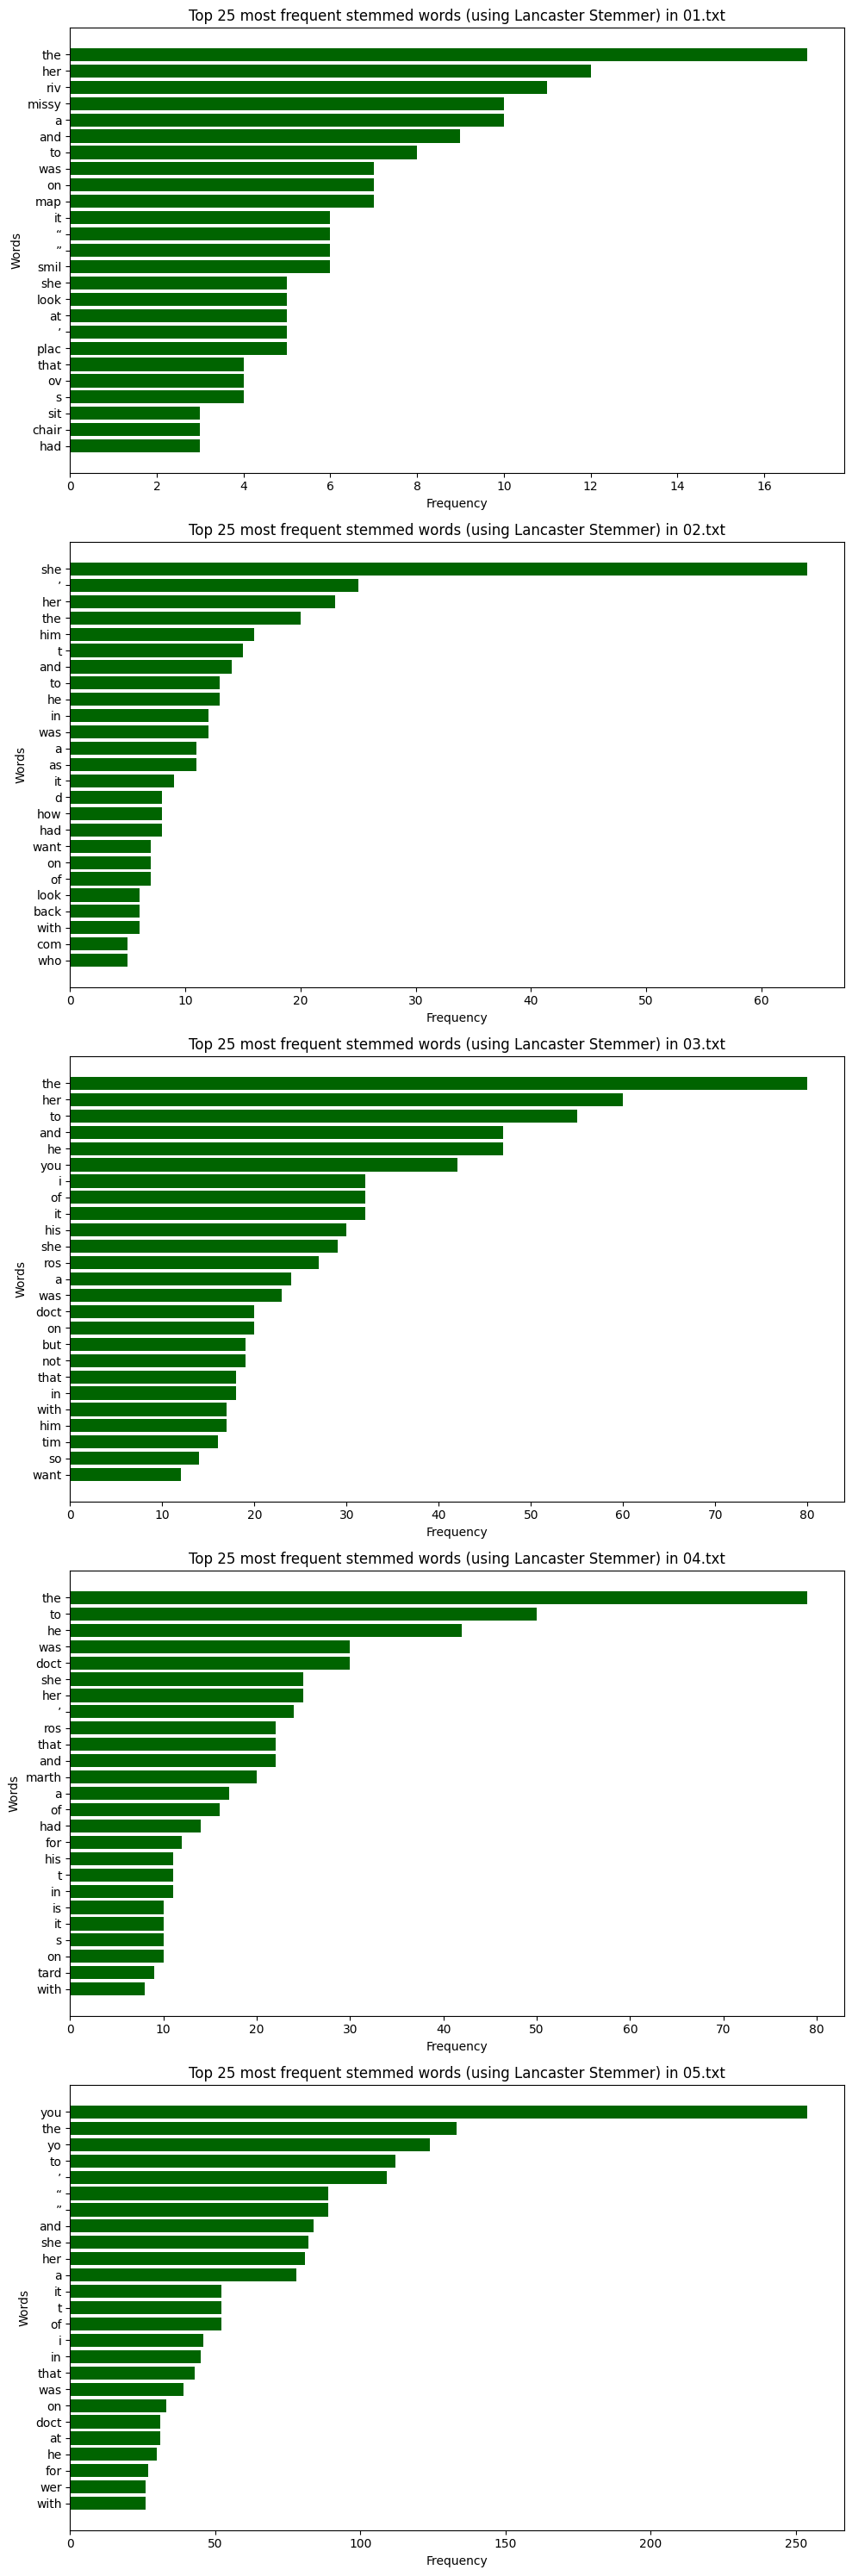

In [80]:
#plot 25 most common words per story as histograms
index = 0
fig, axes = plt.subplots(len(word_freq), 1, figsize = (10, 6 * len(word_freq)))

#Location to export images/output
output_directory = "../Assignment1"
os.makedirs(output_directory, exist_ok=True)

#loop through the dictionary
for filename, word_count in l_word_freq.items():
    top_25 = word_count.most_common(25)

    #separate each file for plotting
    words, freqs = zip(*top_25)

    #plot most freq 25 for file 01
    axes[index].barh(words, freqs, color = 'darkgreen')
    axes[index].set_title(f"Top 25 most frequent stemmed words (using Lancaster Stemmer) in {filename}")
    axes[index].set_xlabel('Frequency')
    axes[index].set_ylabel('Words')

    #invert y axis to have most freq word on top
    axes[index].invert_yaxis()

  # Save the plot for each file (as a PNG file)
    output_file_path = os.path.join(output_directory, f"{filename}_l_histogram.png")
    plt.savefig(output_file_path)
    print(f"l_Histogram for {filename} saved as {output_file_path}")

    # Increment the index for the next plot
    index += 1

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots after saving (optional if you also want to view them)
plt.show()


### Plotting 25 Most Frequent (Lancaster) Stemmed Words in the Corpus

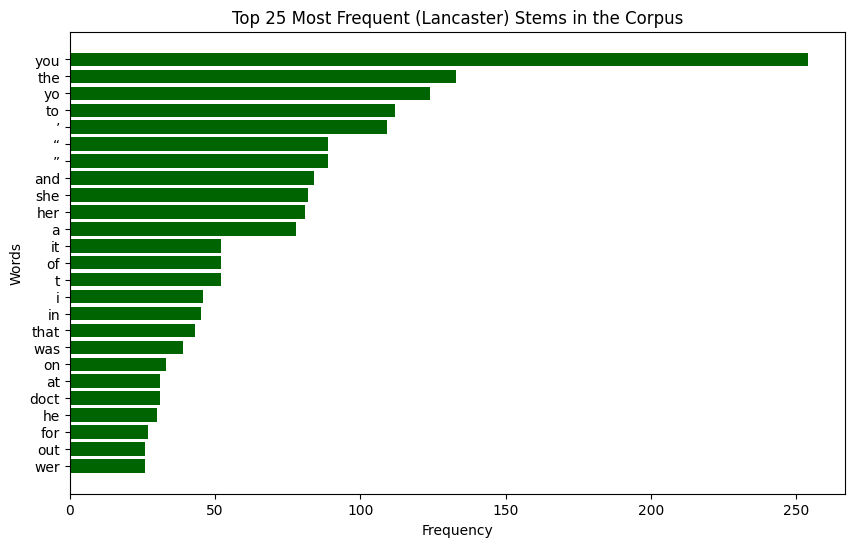

In [162]:
# Get the top 25 most common porter stemmed words from the total word frequency

# Convert total_word_freq (a dictionary) to a Counter
l_total_word_freq_counter = Counter(l_total_word_freq)

top_25_total = l_total_word_freq_counter.most_common(25)

# Separate the words and frequencies for plotting
words, freqs = zip(*top_25_total)

plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.barh(words, freqs, color='darkgreen')  # Horizontal bar chart

# Add titles and labels
plt.title('Top 25 Most Frequent (Lancaster) Stems in the Corpus')
plt.xlabel('Frequency')
plt.ylabel('Words')

# Invert the y-axis to display the most frequent word at the top
plt.gca().invert_yaxis()

plt.savefig('lancasterstemmed_total_word_frequencies_histogram.png')  # Save to a file

plt.show()


# Part III - Using Spacy on Tom Sawyer in three languages

## Preprocessing and Processing

In [82]:
#all preamble, terms of conditions, etc. removed directly from text files themselves
#spacy visualiser
from spacy import displacy

In [84]:
directory2 = "Part_I_3"

In [85]:
#check directory existence
if os.path.exists(directory2):
    print (f"The folder exists: {directory2}")
else:
    print("Error")

The folder exists: Part_I_3


In [86]:
#define read function
def read_file(file_path):
    with open(file_path, encoding = "utf8") as infile:
        contents = infile.read()
    return contents

In [96]:
# Clean texts
en_filepath = "Part_I_3/pg74.txt"
full_en_text = read_file(en_filepath)
en_text = full_en_text.replace('\ufeff', ' ').replace('\n', ' ').strip()

nl_filepath = "Part_I_3/pg18381.txt"
full_nl_text = read_file(nl_filepath)
nl_text = full_nl_text.replace('\ufeff', ' ').replace('\n', ' ').strip()

de_filepath = "Part_I_3/pg30165.txt"
full_de_text = read_file(de_filepath) 
de_text = full_de_text.replace('\ufeff', ' ').replace('\n', ' ').strip()

In [98]:
# load NLP pipelines
import spacy
en_nlp = spacy.load('en_core_web_sm')
nl_nlp = spacy.load('nl_core_news_sm')
de_nlp = spacy.load('de_core_news_sm')

### English POS Tagging

In [99]:
#create doc object
en_doc = en_nlp(en_text)

#tokenize and tag
for token in en_doc:
    print(token, "-", token.pos_)

PREFACE - PROPN
   - SPACE
Most - ADJ
of - ADP
the - DET
adventures - NOUN
recorded - VERB
in - ADP
this - DET
book - NOUN
really - ADV
occurred - VERB
; - PUNCT
one - NUM
or - CCONJ
two - NUM
were - AUX
experiences - NOUN
of - ADP
my - PRON
own - ADJ
, - PUNCT
the - DET
rest - NOUN
those - PRON
of - ADP
boys - NOUN
who - PRON
were - AUX
schoolmates - NOUN
of - ADP
mine - PRON
. - PUNCT
Huck - PROPN
Finn - PROPN
is - AUX
drawn - VERB
from - ADP
life - NOUN
; - PUNCT
Tom - PROPN
Sawyer - PROPN
also - ADV
, - PUNCT
but - CCONJ
not - PART
from - ADP
an - DET
individual - NOUN
— - PUNCT
he - PRON
is - AUX
a - DET
combination - NOUN
of - ADP
the - DET
characteristics - NOUN
of - ADP
three - NUM
boys - NOUN
whom - PRON
I - PRON
knew - VERB
, - PUNCT
and - CCONJ
therefore - ADV
belongs - VERB
to - ADP
the - DET
composite - ADJ
order - NOUN
of - ADP
architecture - NOUN
. - PUNCT
  - SPACE
The - DET
odd - ADJ
superstitions - NOUN
touched - VERB
upon - SCONJ
were - AUX
all - ADV
prevalent - ADJ


### Dutch POS Tagging

In [101]:
#create doc object
nl_doc = nl_nlp(nl_text)

#tokenize and tag
for token in nl_doc:
    print(token, "-", token.pos_)

Produced - SYM
by - SYM
Jeroen - PROPN
Hellingman - PROPN
and - SYM
the - SYM
Online - SYM
Distributed - PROPN
Proofreading - NOUN
Team - PROPN
at - VERB
http://www.pgdp.net/ - PROPN
                                     - SPACE
Mark - PROPN
Twain - PROPN
                    - SPACE
De - DET
lotgevallen - NOUN
van - ADP
Tom - PROPN
Sawyer - PROPN
                            - SPACE
Met - ADP
platen - NOUN
van - ADP
                         - SPACE
Johan - PROPN
Braakensiek - PROPN
                               - SPACE
Zesde - PROPN
druk - ADJ
                 - SPACE
Amsterdam - PROPN
Van - PROPN
Holkema - PROPN
& - SYM
Warendorf - PROPN
           - SPACE
Boek- - SYM
, - PUNCT
Courant- - SYM
en - CCONJ
Steendrukkerij - NOUN
G. - PROPN
J. - PROPN
Thieme - PROPN
, - PUNCT
Nijmegen - PROPN
       - SPACE
HOOFDSTUK - PROPN
I. - PROPN
   - SPACE
" - PUNCT
Tom - PROPN
! - SYM
" - PUNCT
  - SPACE
Geen - DET
antwoord - NOUN
. - PUNCT
  - SPACE
" - PUNCT
Tom - PROPN
! - SYM
" - PUNCT
  - SPACE

### German POS Tagging

In [102]:
#create doc object
de_doc = de_nlp(de_text)

#tokenize and tag
for token in de_doc:
    print(token, "-", token.pos_)

Die - DET
Abenteuer - NOUN
Tom - PROPN
Sawyers - PROPN
  - SPACE
von - ADP
  - SPACE
Mark - PROPN
Twain - PROPN
   - SPACE
_ - PUNCT
Deutsch - NOUN
von - ADP
H. - PROPN
Hellwag - PROPN
_ - X
     - SPACE
Vorwort - NOUN
des - DET
Autors - NOUN
. - PUNCT
  - SPACE
Die - DET
meisten - PRON
der - DET
hier - ADV
erzählten - ADJ
Abenteuer - NOUN
haben - AUX
sich - PRON
tatsächlich - ADV
zugetragen - VERB
. - PUNCT
Das - DET
eine - PRON
oder - CCONJ
das - DET
andere - PRON
habe - AUX
ich - PRON
selbst - ADV
erlebt - VERB
, - PUNCT
die - DET
anderen - PRON
meine - DET
Schulkameraden - NOUN
. - PUNCT
Huck - NOUN
Finn - NOUN
ist - AUX
nach - ADP
dem - DET
Leben - NOUN
gezeichnet - VERB
, - PUNCT
nicht - PART
weniger - ADV
Tom - PROPN
Sawyer - PROPN
, - PUNCT
doch - CCONJ
entspricht - VERB
dieser - PRON
nicht - PART
einer - DET
bestimmten - ADJ
Persönlichkeit - NOUN
, - PUNCT
sondern - CCONJ
wurde - AUX
mit - ADP
charakteristischen - ADJ
Zügen - NOUN
mehrerer - DET
meiner - DET
Altersgenossen - N

## POS Tags Frequency Report

In [103]:
from spacy.attrs import POS

In [132]:
#tag calculation function
def pos_count(doc):
    pos_counts = doc.count_by(POS)
    for pos, count in sorted(pos_counts.items(), key=lambda item: item[1], reverse=True):
        tag = doc.vocab[pos].text
        print(f"{tag}: {count}")

In [133]:
print("The POS Tagging Frequencies in the Original Tom Sawyer are as follows: ") 
pos_count(en_doc)

The POS Tagging Frequencies in the Original Tom Sawyer are as follows: 
PUNCT: 15338
NOUN: 12090
VERB: 11373
PRON: 10298
ADP: 7286
DET: 6866
ADV: 4937
ADJ: 4391
AUX: 4356
CCONJ: 3847
PROPN: 3006
PART: 2127
SPACE: 1928
SCONJ: 1800
NUM: 635
INTJ: 477
X: 73
SYM: 1


In [134]:
print("The POS Tagging Frequencies in the Dutch Translation of Tom Sawyer are as follows: ") 
pos_count(nl_doc)

The POS Tagging Frequencies in the Dutch Translation of Tom Sawyer are as follows: 
PUNCT: 13954
NOUN: 11845
VERB: 11661
PRON: 10072
ADP: 8787
DET: 7034
ADV: 5772
ADJ: 5053
AUX: 3991
PROPN: 3579
CCONJ: 3499
SPACE: 2013
SCONJ: 2004
NUM: 395
INTJ: 366
SYM: 311
X: 24


In [135]:
print("The POS Tagging Frequencies in the German Translation of Tom Sawyer are as follows: ") 
pos_count(de_doc)

The POS Tagging Frequencies in the German Translation of Tom Sawyer are as follows: 
PUNCT: 18422
NOUN: 11154
VERB: 9467
ADV: 9289
PRON: 8767
DET: 7488
ADP: 5264
AUX: 3751
CCONJ: 3363
ADJ: 2956
PROPN: 2162
SPACE: 1829
PART: 1690
SCONJ: 1520
NUM: 314
X: 217
INTJ: 203


# Section 2 - Performing Named Entity Recognition (NER) on data from Section 1.Part I 

In [137]:
#NER Labels for my convenience
labels = en_nlp.get_pipe("ner").labels

for label in labels:
    print(label + ':' + spacy.explain(label))

CARDINAL:Numerals that do not fall under another type
DATE:Absolute or relative dates or periods
EVENT:Named hurricanes, battles, wars, sports events, etc.
FAC:Buildings, airports, highways, bridges, etc.
GPE:Countries, cities, states
LANGUAGE:Any named language
LAW:Named documents made into laws.
LOC:Non-GPE locations, mountain ranges, bodies of water
MONEY:Monetary values, including unit
NORP:Nationalities or religious or political groups
ORDINAL:"first", "second", etc.
ORG:Companies, agencies, institutions, etc.
PERCENT:Percentage, including "%"
PERSON:People, including fictional
PRODUCT:Objects, vehicles, foods, etc. (not services)
QUANTITY:Measurements, as of weight or distance
TIME:Times smaller than a day
WORK_OF_ART:Titles of books, songs, etc.


In [141]:
#Convert each text file to a doc object
path1 = "Part_I_1-2/01.txt"
text_01 = read_file(path1)
doc_01 = en_nlp(text_01)

path2 = "Part_I_1-2/02.txt"
text_02 = read_file(path2)
doc_02 = en_nlp(text_02)

path3 = "Part_I_1-2/03.txt"
text_03 = read_file(path3)
doc_03 = en_nlp(text_03)

path4 = "Part_I_1-2/04.txt"
text_04 = read_file(path4)
doc_04 = en_nlp(text_04)

path5 = "Part_I_1-2/05.txt"
text_05 = read_file(path5)
doc_05 = en_nlp(text_05)

## Annotation 

### NER on doc_01

In [146]:
displacy.render(doc_01, style = 'ent', jupyter = True) 

### Automated Annotation
[Missy]_PERSON was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but [River]_LOC had suggested a physical map to refer to and it was helpful. River walked out of the bedroom. 

### Manual Annotation
[Missy]_PERSON was sitting on a chair in a house, maps and papers spread around, normally her planning was mental, but [River]_PER had suggested a physical map to refer to and it was helpful. [River]_PERSON walked out of the bedroom. 

### NER on doc_02

In [147]:
displacy.render(doc_02, style = 'ent', jupyter = True) 

### Automated Annotation
She wished he’d let her data-ghost go, this felt the same as her life, except she couldn’t adventure on her own, she relied on him for a sense of adventure, she looked down at the diary, she needed a distraction, and as always in the library, as she wanted it happened, [one]_CARDINAL of the [three]_CARDINAL children pushed the door open and [River]_ORG smiled a bit, holding them in her arms, whispering stories of adventures.

### Manual Annotation
She wished he’d let her data-ghost go, this felt the same as her life, except she couldn’t adventure on her own, she relied on him for a sense of adventure, she looked down at the diary, she needed a distraction, and as always in the library, as she wanted it happened, [one]_CARDINAL of the [three]_CARDINAL children pushed the door open and [River]_PERSON smiled a bit, holding them in her arms, whispering stories of adventures.

### NER on doc_03

In [148]:
displacy.render(doc_03, style = 'ent', jupyter = True) 

### Automated Annotation
"I want you safe. My Doctor."

Even as the regeneration energy continues to build, the ethereal golden gleam that swirled along the flow of his veins- a feeling so familiar and yet never welcome, never without pain- But [Rose Tyler]_PERSON , her voice, her words continue to run through his mind.

" [My Doctor]_WORK_OF_ART ."

### Manual Annotation
"I want you safe. My [Doctor]_PERSON."

Even as the regeneration energy continues to build, the ethereal golden gleam that swirled along the flow of his veins- a feeling so familiar and yet never welcome, never without pain- But [Rose Tyler]_PERSON , her voice, her words continue to run through his mind.

" My [Doctor]_PERSON ."

### NER on doc_04

In [150]:
displacy.render(doc_04, style = 'ent', jupyter = True)

### Automated Annotation
The Doctor had no clue how he could live life again without [Rose]_PERSON . He genuinely believed that he, that this body, was made for her. The way her hand fit into his when he held hers before running, it was absolutely perfect.

### Manual Annotation
The [Doctor]_PERSON had no clue how he could live life again without [Rose]_PERSON . He genuinely believed that he, that this body, was made for her. The way her hand fit into his when he held hers before running, it was absolutely perfect.

### NER on doc_05

In [151]:
displacy.render(doc_05, style = 'ent', jupyter = True)

### Automated Annotation
The Doctor was the mediator, the [one]_CARDINAL good with words, while you were the brawn. And for a while it worked out quite fine. As far as you can remember, you [two]_CARDINAL have always traveled together, despite your differences. 

### Manual Annotation
The [Doctor]_PERSON was the mediator, the [one]_CARDINAL good with words, while you were the brawn. And for a while it worked out quite fine. As far as you can remember, you [two]_CARDINAL have always traveled together, despite your differences. 

## Precision, Recall, F1

In [154]:
%%capture
!pip install scikit-learn

In [155]:
from sklearn.metrics import classification_report

In [159]:
y_true = ['PERSON', 'PERSON', 'PERSON', 'CARDINAL', 'CARDINAL', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'PERSON', 'CARDINAL', 'CARDINAL'] 
y_pred = ['PERSON', 'LOC', ' ', 'CARDINAL', 'CARDINAL', 'ORG', ' ', 'PERSON', 'WORK_OF_ART', ' ', 'PERSON', ' ', 'CARDINAL', 'CARDINAL'] 
target_names = ['PERSON', 'CARDINAL', 'LOC', 'ORG', 'WORK_OF_ART', ' '] 

print(classification_report(y_true, y_pred, target_names = target_names, zero_division = 0)) 

              precision    recall  f1-score   support

      PERSON       0.00      0.00      0.00         0
    CARDINAL       1.00      1.00      1.00         4
         LOC       0.00      0.00      0.00         0
         ORG       0.00      0.00      0.00         0
 WORK_OF_ART       1.00      0.30      0.46        10
                   0.00      0.00      0.00         0

    accuracy                           0.50        14
   macro avg       0.33      0.22      0.24        14
weighted avg       1.00      0.50      0.62        14

